In [1]:
#Importamos la librerias que vayamos a utiliar
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from wordcloud import WordCloud


EDA-Exploratory Data Analysis

In [4]:
#cargamos el dataframe
games_steam_df = pd.read_csv(('C:/Users/CRISTIAN/Desktop/Proyecto final #  1/Proyecto-Final-individual-1-Henry/csv/games_steam_exportado.csv'))


In [5]:
#informacion general
games_steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74834 entries, 0 to 74833
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    74834 non-null  int64  
 1   publisher     59193 non-null  object 
 2   app_name      74831 non-null  object 
 3   title         72783 non-null  object 
 4   url           74834 non-null  object 
 5   tags          74649 non-null  object 
 6   reviews_url   74833 non-null  object 
 7   specs         73893 non-null  object 
 8   price         74834 non-null  float64
 9   early_access  74834 non-null  bool   
 10  item_id       74833 non-null  float64
 11  developer     71355 non-null  object 
 12  release_year  72441 non-null  float64
 13  genres        71551 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 7.5+ MB


In [6]:
#Estadistica descriptiva de variables númericas
games_steam_df.describe()


,Unnamed: 0,price,item_id,release_year
count,74834.000000,74834.000000,7.483300e+04,72441.000000
mean,15959.255940,8.405883,4.662488e+05,2015.195607
std,8951.242323,15.923128,1.731647e+05,2.921323
min,0.000000,0.000000,1.000000e+01,1970.000000
25%,8269.000000,1.990000,3.441400e+05,2015.000000
50%,15863.500000,4.990000,4.626700e+05,2016.000000
75%,23690.750000,9.990000,6.020700e+05,2017.000000
max,32134.000000,995.000000,2.028850e+06,2021.000000


In [7]:
#Estadistica descriptiva de variables categoricas:
columnas_object = games_steam_df.select_dtypes(include=['object']).columns
df = games_steam_df[columnas_object]

In [8]:
df.describe()

,publisher,app_name,title,url,tags,reviews_url,specs,developer,genres
count,59193,74831,72783,74834,74649,74833,73893,71355,71551
unique,8236,32094,30054,32133,15395,32132,4649,10992,22
top,KISS ltd,AutoTileSet,AutoTileSet,http://store.steampowered.com/app/313320/AutoT...,"['Casual', 'Simulation']",http://steamcommunity.com/app/313320/reviews/?...,['Single-player'],Ubisoft - San Francisco,Indie
freq,807,11,11,11,2581,11,6298,2516,15858


In [126]:
#cantidad de registros segundo 'item_id'
games_steam_df['id'].nunique()

32094

In [9]:
games_steam_df['release_year'].unique()

array([2018., 2017.,   nan, 1997., 1998., 2016., 2006., 2005., 2003.,
       2007., 2002., 2000., 1995., 1996., 1994., 2001., 1993., 2004.,
       1999., 2008., 2009., 1992., 1989., 2010., 2011., 2013., 2012.,
       2014., 1983., 1984., 2015., 1990., 1988., 1991., 1985., 1982.,
       1987., 1981., 1986., 2021., 2019., 1975., 1970., 1980.])

In [10]:
#distribucion de juegos, segun el año de lanzamiento
year_game = games_steam_df['release_year'].value_counts()
year_game

release_year
2017.0    25509
2016.0    17935
2015.0    12423
2014.0     6471
2013.0     3091
2012.0     2161
2011.0     1035
2010.0      706
2009.0      513
2018.0      500
2008.0      351
2007.0      277
2006.0      230
2005.0      149
2003.0      128
2001.0      119
2004.0      107
1999.0       87
1998.0       86
2002.0       70
1997.0       67
1996.0       60
2000.0       60
1994.0       56
1995.0       51
1993.0       49
1992.0       26
1991.0       26
1990.0       16
1989.0       14
2019.0       13
1988.0       11
1987.0       10
1984.0        7
1983.0        6
1986.0        5
1985.0        3
1982.0        3
1981.0        3
2021.0        3
1970.0        2
1975.0        1
1980.0        1
Name: count, dtype: int64

C:\Users\CRISTIAN\AppData\Local\Temp\ipykernel_1396\79325713.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= year_game.index.astype(int), y= year_game.values, palette='coolwarm')


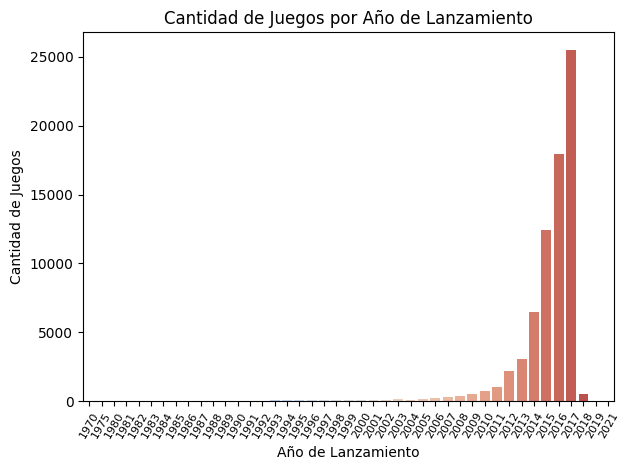

In [42]:
sns.barplot(x= year_game.index.astype(int), y= year_game.values, palette='coolwarm')
plt.title('Cantidad de Juegos por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento') 
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation= 60, fontsize=8)
plt.tight_layout()
plt.show()

In [27]:
#Distribución de juegos según genero
genre_year = games_steam_df['genres'].value_counts().sort_values(ascending=False)
genre_year

genres
Indie                      15858
Action                     11319
Casual                      8282
Adventure                   8242
Strategy                    6957
Simulation                  6699
RPG                         5479
Free to Play                2031
Early Access                1462
Sports                      1257
Massively Multiplayer       1108
Racing                      1083
Design and Illustration      460
Utilities                    340
Web Publishing               268
Animation and Modeling       183
Education                    125
Video Production             116
Software Training            105
Audio Production              93
Photo Editing                 77
Accounting                     7
Name: count, dtype: int64

C:\Users\CRISTIAN\AppData\Local\Temp\ipykernel_1396\1922835127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=games_steam_df, y='genres', orient='h', palette='husl', order=games_steam_df['genres'].value_counts().sort_values(ascending= False).index)


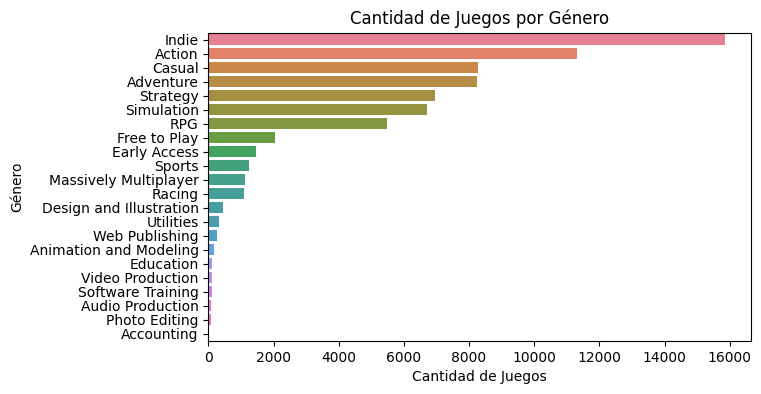

In [41]:
plt.figure(figsize=(7, 4))
sns.countplot(data=games_steam_df, y='genres', orient='h', palette='husl', order=games_steam_df['genres'].value_counts().sort_values(ascending= False).index)
plt.title('Cantidad de Juegos por Género')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Género')

plt.show()

In [30]:
#Obtenemos el precio para cada juego
precios = games_steam_df.groupby('item_id')['price'].unique().reset_index().explode('price')

In [31]:
#Nos quedamos solo con nuestros precios distintos a '--', ya que ese valor reemplaza a los valore nulos
precios = precios[precios['price'] != '--']

In [32]:
#Cambiamos el tipo de dato de la columna price a float
precios['price'] = precios['price'].astype(float)

C:\Users\CRISTIAN\AppData\Local\Temp\ipykernel_1396\4020635955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'price', data = precios, linewidth = 2, palette = 'dark')


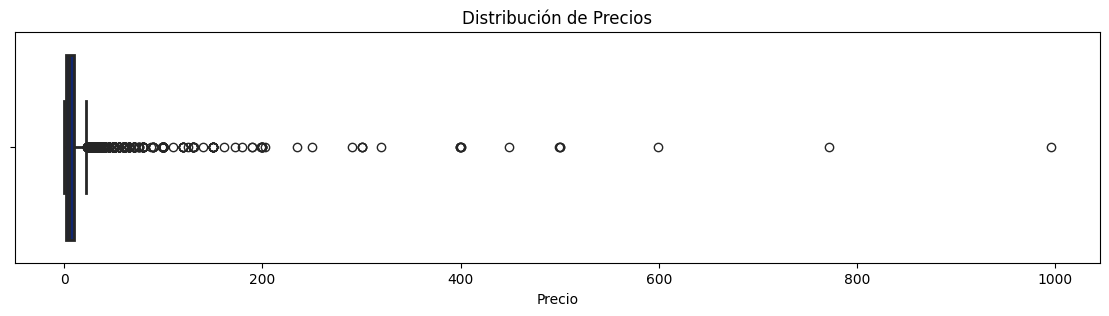

In [43]:
#Graficamos
plt.figure(figsize = (14, 3))
sns.boxplot(x = 'price', data = precios, linewidth = 2, palette = 'dark') 
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.show()

In [34]:
#Estadistica descriptiva del DataFrame precios:
precios.describe()

,item_id,price
count,3.213200e+04,32132.000000
mean,4.517524e+05,8.514090
std,1.827147e+05,16.086051
min,1.000000e+01,0.000000
25%,3.292775e+05,1.990000
50%,4.520300e+05,4.990000
75%,5.933925e+05,9.990000
max,2.028850e+06,995.000000


In [35]:
#Filtramos los precios, menores a 100, para ver mas en detalle
precios_filter = precios[precios['price'] < 100]

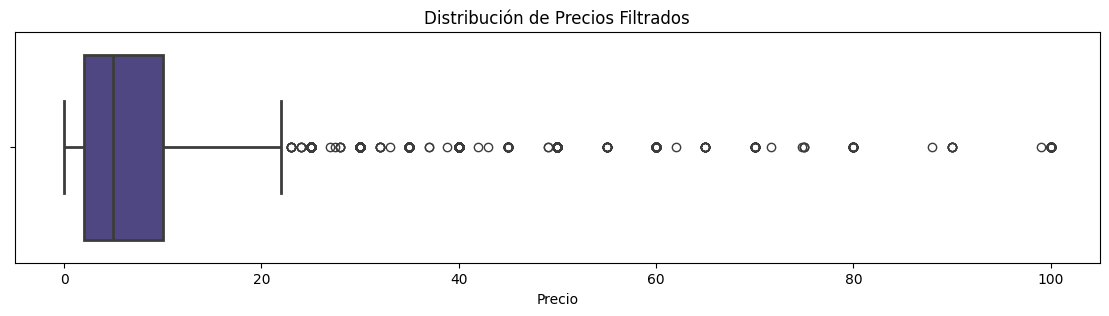

In [46]:
#Graficamos
plt.figure(figsize = (14, 3))
sns.boxplot(x = 'price', data = precios_filter, linewidth = 2, color= 'darkslateblue') 
plt.title('Distribución de Precios Filtrados')
plt.xlabel('Precio')
plt.show()

In [37]:
#nos damos cuenta que los outliers comienzan pasados los 20 USD. Asique procedemos a contarlos:
cantidad_outliers = (precios['price'] > 22).sum()
print(f'La cantidad de outliers es de: {cantidad_outliers}')

La cantidad de outliers es de: 1875


In [38]:
#rectificamos el porcentaje de outlires
porcentaje_outlires = round((cantidad_outliers / (precios['price'].count())) * 100, 2)
print(f'El porcentaje de outliers es de: {porcentaje_outlires}%')

El porcentaje de outliers es de: 5.84%


Al analizar la proporción de valores atípicos en comparación con el total de registros y su porcentaje, concluimos que estos no alteran significativamente nuestro conjunto de datos. Es común encontrar juegos que cuesten más de 20 USD y que incluso puedan alcanzar precios de hasta 200 USD. Sin embargo, los precios que exceden los 200 USD probablemente sean resultado de errores en el registro de los datos o situaciones similares.

In [39]:
games_steam_df.to_csv("C:/Users/CRISTIAN/Desktop/Proyecto final #  1/Proyecto-Final-individual-1-Henry/csv/games_steam_exportado_limpio.csv")